## **Исследование данных о продажах ноутбуков**

Данные о ноутбуках:

* img_link - ссылка на изображение ноутбука
* name - название ноутбука
* price - цена в рупиях
* processor - модель процессора
* ram - оперативная память (ГБ)
* os - операционная система
* storage - размер хранилища (ГБ)
* display - диагональ экрана в дюймах
* rating - пользовательский рейтинг
* no_of_ratings - число оценок
* no_of_reviews - число отзывов

**Цель**: Поиск корреляции между уровнем продаж и характеристиками ноутбука

Источник: https://www.kaggle.com/datasets/rajugc/laptop-selection-dataset

**Гипотеза**: Выпуск ноутбука с востребованными характеристиками позволит увеличить уровнь продаж.



Импорт необходимых библиотек для работы с данными

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('laptops.csv')
data.head(5)

,Unnamed: 0,img_link,name,price(in Rs.),processor,ram,os,storage,display(in inch),rating,no_of_ratings,no_of_reviews
0,0,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.5,14.0,1.0
1,1,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo V15 G2 Core i3 11th Gen,37500,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,15.6,4.4,53.0,3.0
2,2,https://rukminim1.flixcart.com/image/312/312/l...,ASUS TUF Gaming F15 Core i5 10th Gen,49990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.4,4733.0,463.0
3,3,https://rukminim1.flixcart.com/image/312/312/x...,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,15.6,4.3,10406.0,1040.0
4,4,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Athlon Dual Core,18990,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,DOS Operating System,256 GB SSD,14.0,3.8,18.0,3.0


Удаление дублирующихся индексов:

In [3]:
data.drop(data.columns[0], inplace=True, axis = 1)
data.head(5)

,img_link,name,price(in Rs.),processor,ram,os,storage,display(in inch),rating,no_of_ratings,no_of_reviews
0,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.5,14.0,1.0
1,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo V15 G2 Core i3 11th Gen,37500,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,15.6,4.4,53.0,3.0
2,https://rukminim1.flixcart.com/image/312/312/l...,ASUS TUF Gaming F15 Core i5 10th Gen,49990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.4,4733.0,463.0
3,https://rukminim1.flixcart.com/image/312/312/x...,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,15.6,4.3,10406.0,1040.0
4,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Athlon Dual Core,18990,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,DOS Operating System,256 GB SSD,14.0,3.8,18.0,3.0


Переименование колонок:

In [4]:
data.rename(columns = {'price(in Rs.)': 'price','display(in inch)': 'display' }, inplace=True)

Проверка качества данных:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   img_link       984 non-null    object 
 1   name           984 non-null    object 
 2   price          984 non-null    int64  
 3   processor      984 non-null    object 
 4   ram            984 non-null    object 
 5   os             984 non-null    object 
 6   storage        984 non-null    object 
 7   display        984 non-null    float64
 8   rating         688 non-null    float64
 9   no_of_ratings  688 non-null    float64
 10  no_of_reviews  688 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 84.7+ KB


**Вывод**: типы данных распознаны верно, приводить колонки к другим типам не требуется.

In [6]:
data.isnull().mean().sort_values(ascending=False)

rating           0.300813
no_of_ratings    0.300813
no_of_reviews    0.300813
img_link         0.000000
name             0.000000
price            0.000000
processor        0.000000
ram              0.000000
os               0.000000
storage          0.000000
display          0.000000
dtype: float64

**Вывод**: присутствует значительное количество (около 30%) пропущенных значений в колонках 'rating', 'no_of_ratings', 'no_of_reviews'. Эти данные необходимо удалить, поскольку они являются основоположными при установлении востребованности у покупателей тех или иных характеристик ноутбука.

В данном случае, замена отсутствующих данных, например, средними значениями, привела бы к получению недостоверных результатов.

In [7]:
laptops = data.dropna()

In [8]:
laptops.isnull().mean().sort_values(ascending=False)

img_link         0.0
name             0.0
price            0.0
processor        0.0
ram              0.0
os               0.0
storage          0.0
display          0.0
rating           0.0
no_of_ratings    0.0
no_of_reviews    0.0
dtype: float64

In [9]:
laptops.shape

(688, 11)

**Вывод**: удалены пропущенные значения.

In [10]:
if laptops.shape != laptops.drop_duplicates().shape:
  print('Дубликаты обнаружены и удалены')
  laptops = laptops.drop_duplicates()
else:
  print('Дубликаты отсутствуют')

Дубликаты обнаружены и удалены


In [11]:
laptops.shape

(531, 11)

**Вывод**: удалены дубликаты.

### **2. Расчет основных статистических показателей**



In [12]:
laptops.describe()

,price,display,rating,no_of_ratings,no_of_reviews
count,531.000000,531.000000,531.000000,531.000000,531.000000
mean,70958.193974,15.087458,4.273446,688.165725,82.702448
std,44831.132621,1.577175,0.359863,1766.214946,212.978655
min,15990.000000,11.600000,1.600000,1.000000,0.000000
25%,41990.000000,14.000000,4.100000,15.000000,2.000000
50%,59990.000000,15.600000,4.300000,87.000000,11.000000
75%,80790.000000,15.600000,4.500000,463.000000,57.500000
max,345390.000000,35.000000,5.000000,15492.000000,2054.000000


**Вывод**:

* Распределение данных о рейтинге близко к нормальному (медиана почти совпадает со средним значением)
* Распределение данных о цене, количестве оценок и отзывов не является нормальным

### **3. Построение графиков и дополнительная обработка данных**

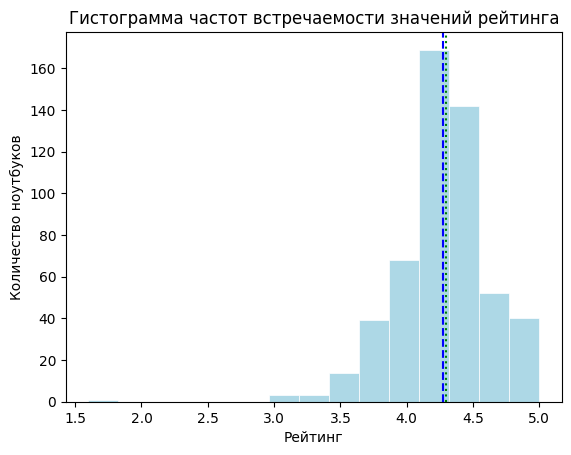

In [13]:
mean = laptops['rating'].mean()
median = laptops['rating'].median()

plt.hist(laptops['rating'], bins = 15, color = 'lightblue',linewidth=0.5, edgecolor="white")
plt.ylabel('Количество ноутбуков')
plt.axvline(mean, linestyle='--', color = 'blue')
plt.axvline(median, linestyle=':', color = 'green')
plt.xlabel('Рейтинг')
plt.title('Гистограмма частот встречаемости значений рейтинга')
plt.show()

**Вывод**: визуальный анализ гистограммы также показывает, что распределение рейтинга близко к нормальному, так как медиана и среднее значение почти равны.

[]

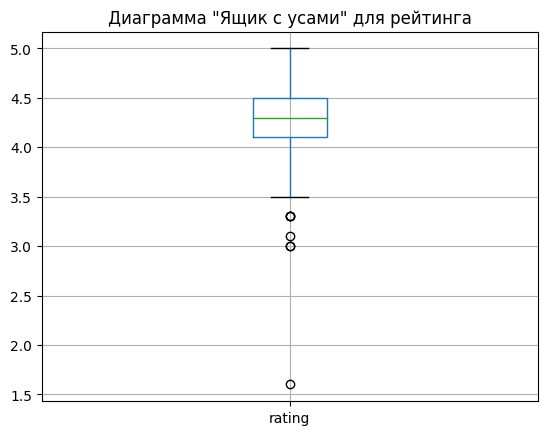

In [37]:
laptops.boxplot(['rating'])
plt.title('Диаграмма "Ящик с усами" для рейтинга')
plt.plot()

**Вывод**: наблюдается незначительное количество выбросов

In [15]:
laptops.head(5)

,img_link,name,price,processor,ram,os,storage,display,rating,no_of_ratings,no_of_reviews
0,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.5,14.0,1.0
1,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo V15 G2 Core i3 11th Gen,37500,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,15.6,4.4,53.0,3.0
2,https://rukminim1.flixcart.com/image/312/312/l...,ASUS TUF Gaming F15 Core i5 10th Gen,49990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.4,4733.0,463.0
3,https://rukminim1.flixcart.com/image/312/312/x...,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,15.6,4.3,10406.0,1040.0
4,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Athlon Dual Core,18990,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,DOS Operating System,256 GB SSD,14.0,3.8,18.0,3.0


**Вывод**

Для построения тепловых карт выделим cледующие характеристики:

1. Brand
2. Ram
3. OS
4. Processor
5. Storage
6. Display

**1) Brand**

In [16]:
brand = []
for elem in laptops['name']:
  brand.append(elem.split(' ')[0].capitalize())
laptops['brand'] = brand

**2) Ram**

In [17]:
ram_gb = []
for elem in laptops['ram']:
  a = ' '.join(elem.split(' ')[0:2])
  ram_gb.append(a)
laptops['ram_gb'] = ram_gb

**3) OS**

In [18]:
os = []
for elem in laptops['os']:
  os.append(elem.split('bit')[-1].strip())
laptops['operating_system'] = os

**4) Processor**

In [19]:
proc = []
for elem in laptops['processor']:
  proc.append(elem.split('(')[0].strip())
laptops['processor_short'] = proc

**5) Storage**

In [20]:
laptops['storage'].value_counts()

512 GB SSD                                                                                                                                                                                                              321
256 GB SSD                                                                                                                                                                                                               73
1 TB SSD                                                                                                                                                                                                                 62
1 TB HDD|256 GB SSD                                                                                                                                                                                                      27
1 TB HDD                                                                                                                

In [21]:
laptops = laptops.drop(laptops[laptops['storage'] == 'PCI-e SSD (NVMe) ready,Silver-Lining Print Keyboard,Matrix Display (Extend),Cooler Boost 5,Hi-Res Audio,Nahimic 3,144Hz Panel,Thin Bezel,RGB Gaming Keyboard,Speaker Tuning Engine,MSI Center'].index)
laptops = laptops.drop(laptops[laptops['storage'] == 'PCI-e Gen4 SSD?SHIFT?Matrix Display (Extend)?Cooler Boost 3?Thunderbolt 4?Finger Print Security?True Color 2.0?Hi-Res Audio?Nahimic 3? 4-Sided Thin bezel?MSI Center?Silky Smooth Touchpad?Military-Grade Durability'].index)

**6) Display**

Исправление значений в см на значения в дюймах

In [22]:
laptops[laptops['display'] == 35.0]

,img_link,name,price,processor,ram,os,storage,display,rating,no_of_ratings,no_of_reviews,brand,ram_gb,operating_system,processor_short
594,https://rukminim1.flixcart.com/image/312/312/k...,DELL Vostro Core i5 11th Gen,63090,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.0,3.9,89.0,9.0,Dell,8 GB,Windows 10 Operating System,Intel Core i5 Processor
861,https://rukminim1.flixcart.com/image/312/312/k...,DELL Vostro Core i3 11th Gen,43090,Intel Core i3 Processor (11th Gen),4 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,35.0,4.2,33.0,7.0,Dell,4 GB,Windows 11 Operating System,Intel Core i3 Processor


In [23]:
laptops['display'] = laptops['display'].replace(35.0, 35.0*0.39)

### **4. Построение матриц корреляции**

In [24]:
corr = laptops.corr(numeric_only=True).round(2)
corr.style.background_gradient(cmap='YlGn')

,price,display,rating,no_of_ratings,no_of_reviews
price,1.000000,0.160000,0.320000,-0.120000,-0.130000
display,0.160000,1.000000,0.070000,-0.110000,-0.100000
rating,0.320000,0.070000,1.000000,0.080000,0.060000
no_of_ratings,-0.120000,-0.110000,0.080000,1.000000,0.980000
no_of_reviews,-0.130000,-0.100000,0.060000,0.980000,1.000000


**Вывод**:
* Наблюдается относительно высокая корреляция между *price* и *rating* (0.32)
* Необходимо введение дополнительного признака *popularity*, являющегося комбинацией  *rating*, *no_of_reviews*, *no_of_ratings*.

In [25]:
laptops['popularity'] = laptops['rating'] + laptops['no_of_reviews']/laptops['no_of_ratings']

In [26]:
corr = laptops.corr(numeric_only=True).round(2)
corr.style.background_gradient(cmap='YlGn')

,price,display,rating,no_of_ratings,no_of_reviews,popularity
price,1.000000,0.160000,0.320000,-0.120000,-0.130000,0.360000
display,0.160000,1.000000,0.070000,-0.110000,-0.100000,0.060000
rating,0.320000,0.070000,1.000000,0.080000,0.060000,0.960000
no_of_ratings,-0.120000,-0.110000,0.080000,1.000000,0.980000,0.060000
no_of_reviews,-0.130000,-0.100000,0.060000,0.980000,1.000000,0.060000
popularity,0.360000,0.060000,0.960000,0.060000,0.060000,1.000000


**Вывод**: сохраняется относительно высокая положительная корреляция между *price* и введенным признаком *popularity*.

Построение корреляционных матриц с дополнительными характеристиками, приведенными к числовому виду (*brand, os, ram, processor, storage, display*)

**1) Brand**

In [27]:
import seaborn as sns

<ipython-input-28-54c8211ff4dd>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(brand_label.corr().round(2), annot=True)


<Axes: >

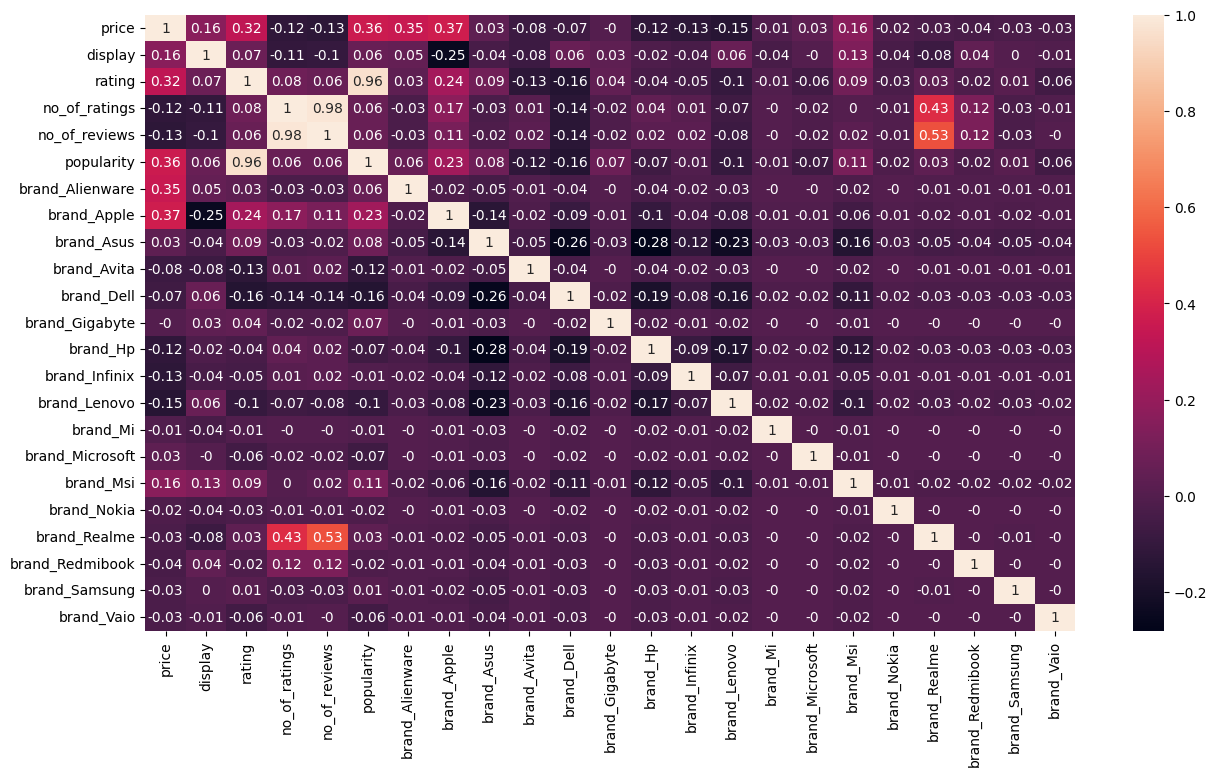

In [28]:
brand_label = pd.get_dummies(laptops,
                    #  columns = ['processor', 'ram', 'storage', 'brand', 'os'],
                     columns = ['brand'],
                     drop_first=True) #drop_first чтобы признаки введенные не повторялись. Полезно будет в машинном обучении
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(brand_label.corr().round(2), annot=True)

**Вывод**: наблюдается корреляция между брендом Apple и *popularity* (0.23).


**2) Ram**

<ipython-input-29-4b5c1c590af1>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ram_label.corr().round(2), annot=True)


<Axes: >

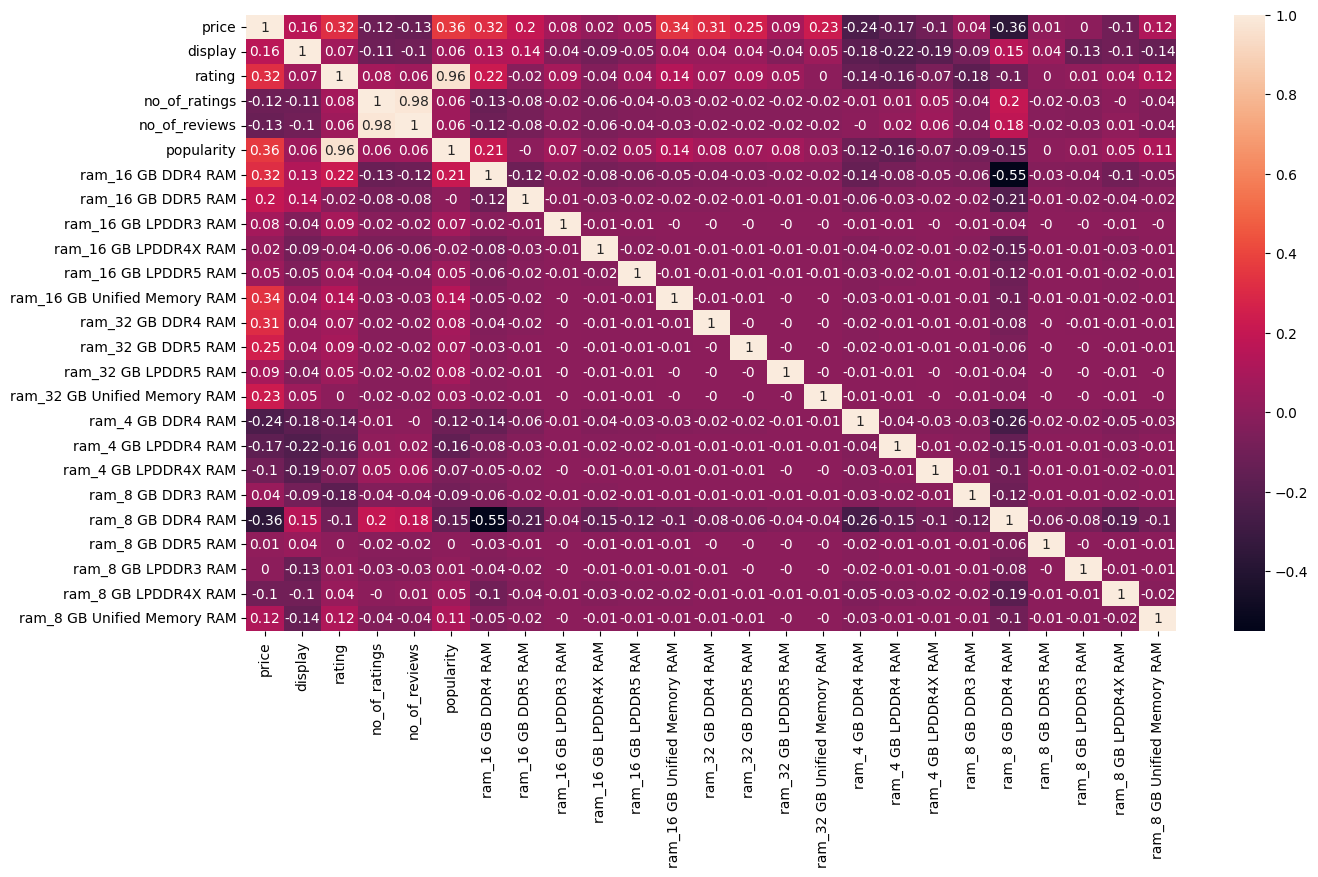

In [29]:
ram_label = pd.get_dummies(laptops,
                     columns = ['ram'],
                     drop_first=True)
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(ram_label.corr().round(2), annot=True)

**Вывод**: наблюдается корреляция между ram_16 GB DDR4 RAM и *popularity* (0.21).



**3) OS**

<ipython-input-30-1381c74135c9>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(os_label.corr().round(2), annot=True)


<Axes: >

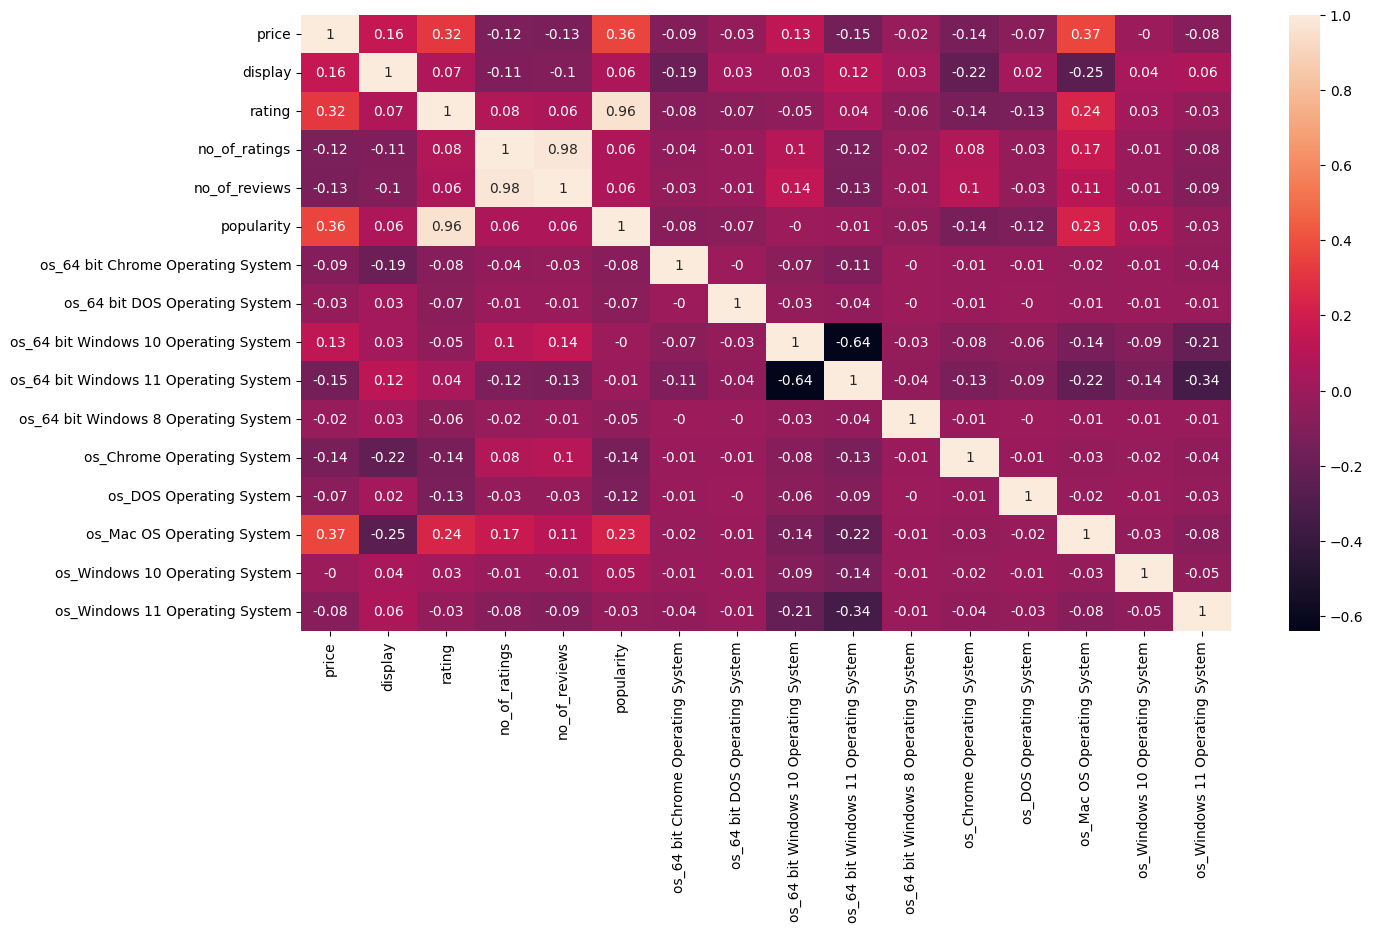

In [30]:
os_label = pd.get_dummies(laptops,
                     columns = ['os'],
                     drop_first=True)
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(os_label.corr().round(2), annot=True)

**Вывод**: наблюдается корреляция между Mac OS и *popularity* (0.23).

**4) Processor**

<ipython-input-31-25e9ef451d0d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(processor_label.corr().round(2), annot=True)


<Axes: >

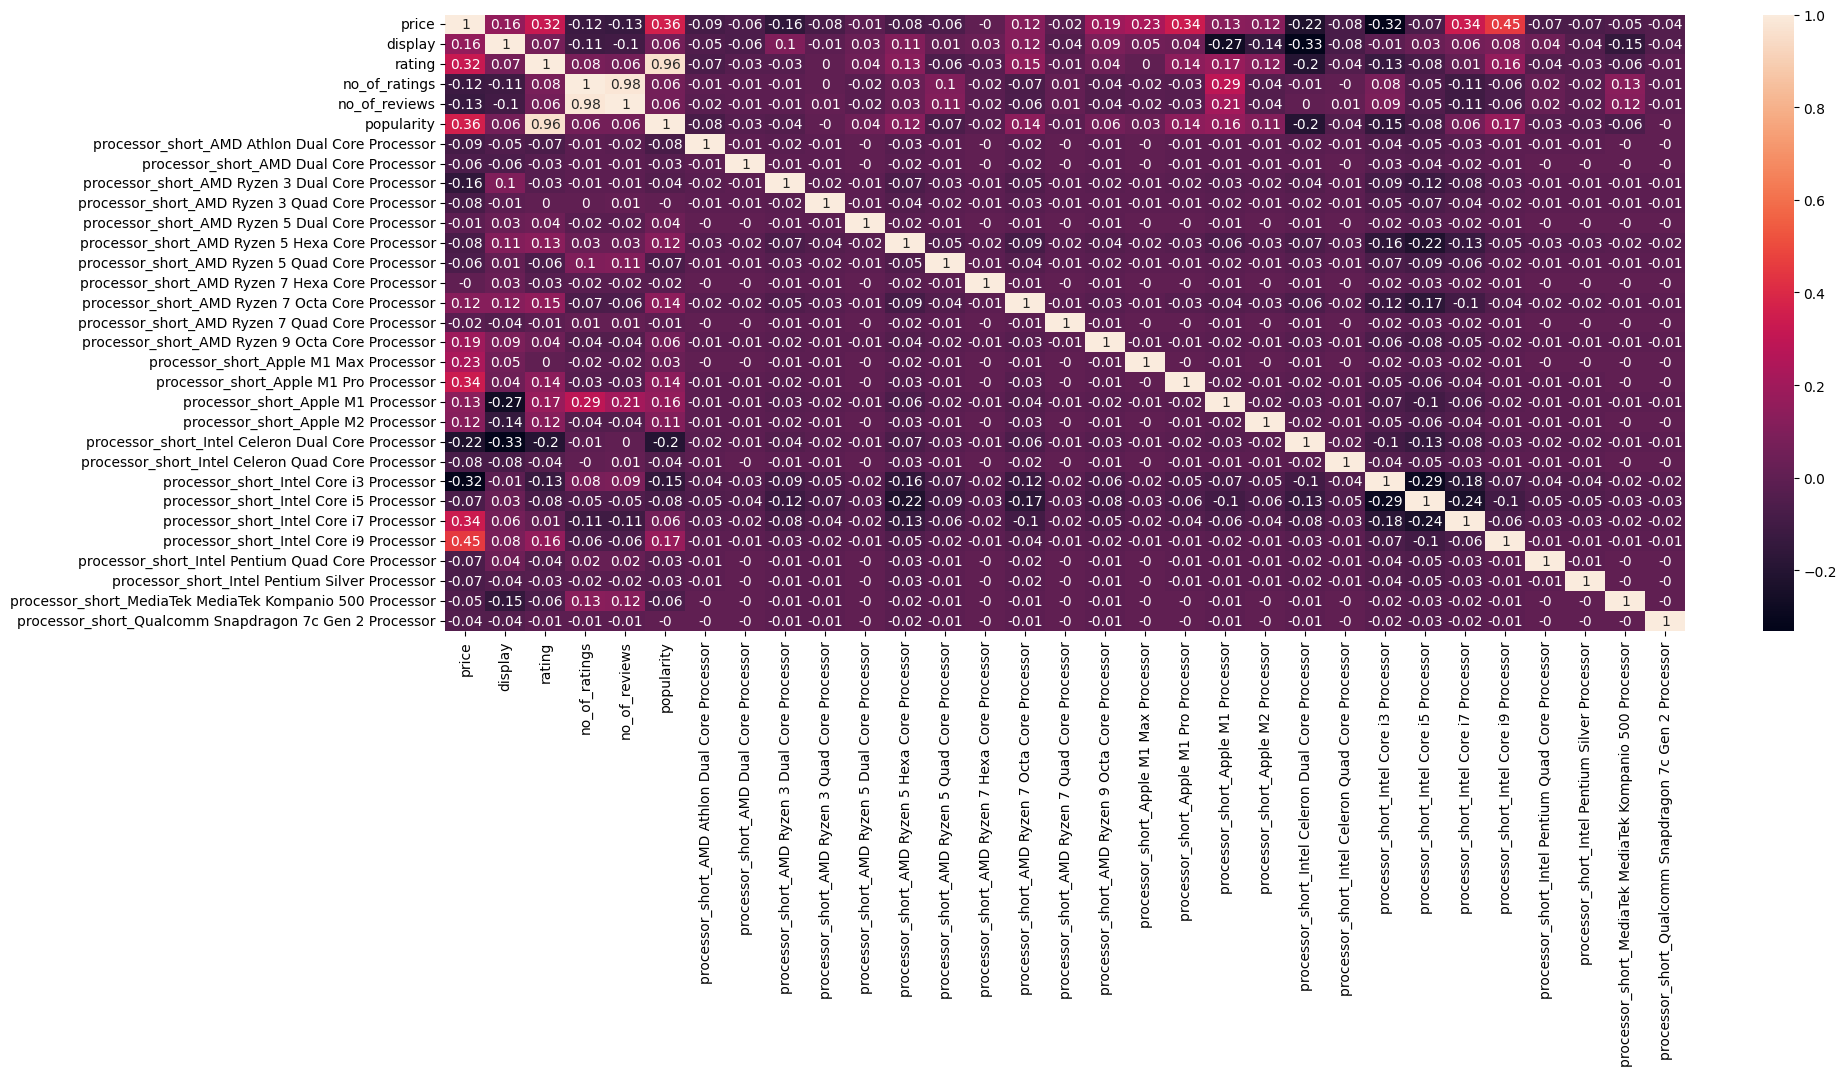

In [31]:
processor_label = pd.get_dummies(laptops,
                     columns = ['processor_short'],
                     drop_first=True)
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(processor_label.corr().round(2), annot=True)

**Вывод**: наблюдается корреляция между Intel Core i9 и *popularity* (0.17), Apple M1 и *popularity* (0.16).

**5) Storage**

<ipython-input-32-8ac16c2bef2b>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(storage_label.corr().round(2), annot=True)


<Axes: >

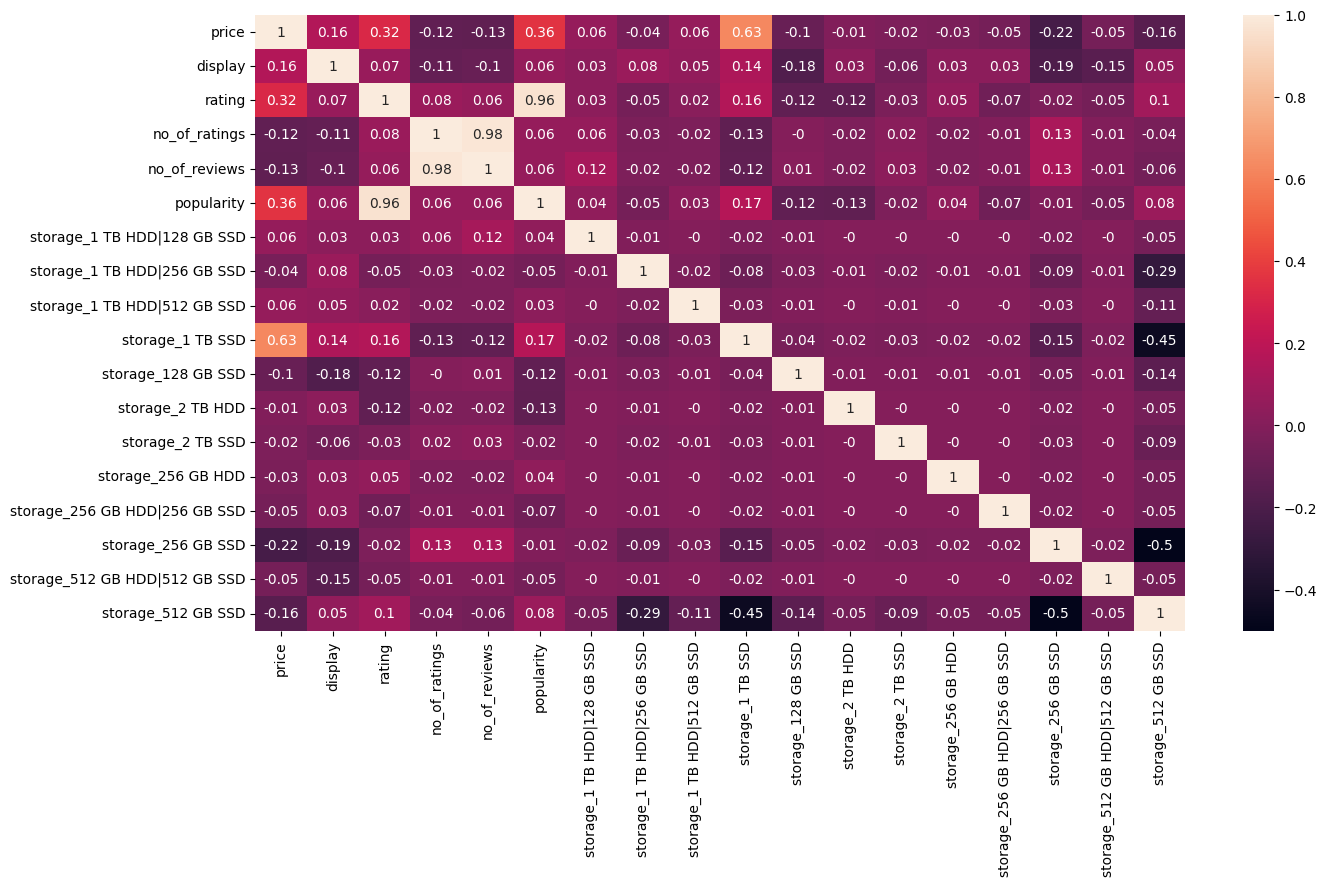

In [32]:
storage_label = pd.get_dummies(laptops,
                     columns = ['storage'],
                     drop_first=True)
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(storage_label.corr().round(2), annot=True)

**Вывод**: наблюдается корреляция между 1 TB SSD и *popularity* (0.17).

**6) Display**

<ipython-input-33-1e0ab99f9ae5>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(display_label.corr().round(2), annot=True)


<Axes: >

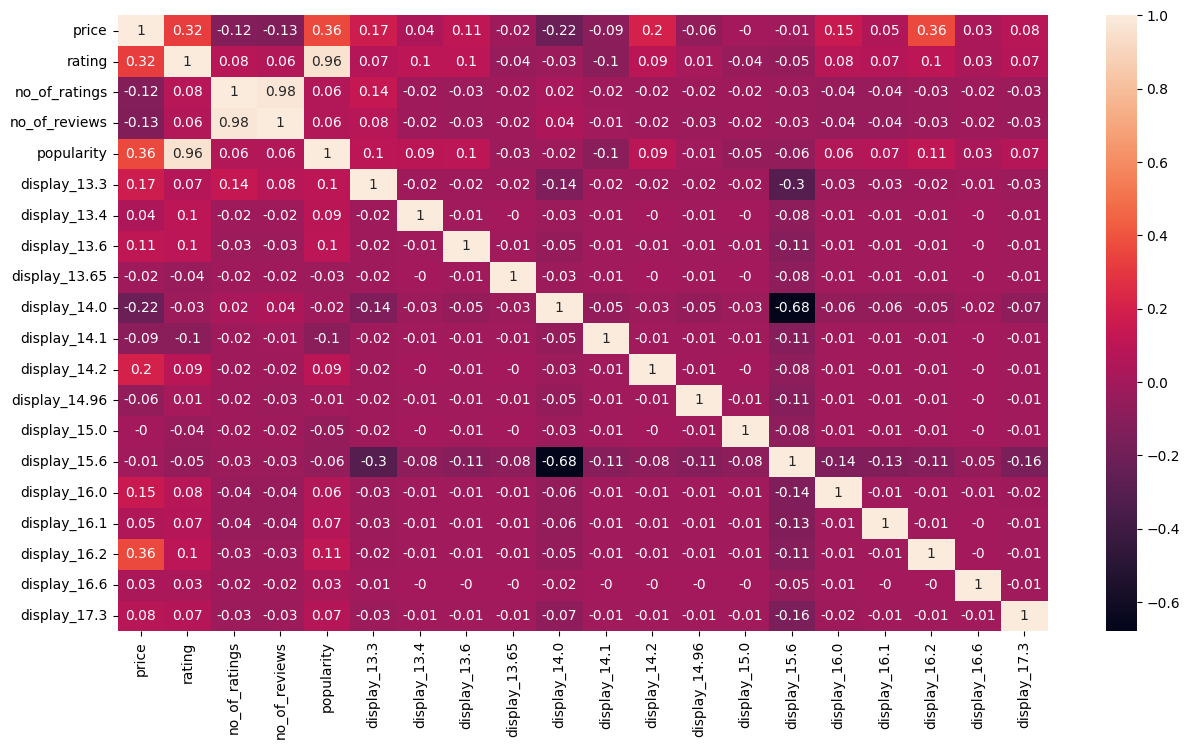

In [33]:
display_label = pd.get_dummies(laptops,
                    #  columns = ['processor', 'ram', 'storage', 'brand', 'os'],
                     columns = ['display'],
                     drop_first=True)
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(display_label.corr().round(2), annot=True)

**Вывод**: не обнаружено значимой корреляции между показателями.

**Выводы**:

* Необходим дальнейший анализ данных для проверки поставленной гипотезы, поскольку получена слабая положительная корреляция между введенным признаком *polularity* и некоторыми характеристиками ноутбуков, такими как:


*   Бренд Apple, corr_coeff = 0.23
*   Ram 16 GB DDR4, corr_coeff = 0.21
*   OS Mac, corr_coeff = 0.23

